In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

In [3]:
from astropy import units as u
from astropy import constants as cnt

In [4]:
#from matplotlib import rc
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                     #'font.family': 'Droid Sans'
                      'figure.figsize': (4, 3.8)
                    })

red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [5]:
bpp = pd.read_csv('bpp_1M-r10.csv')

In [6]:
sigma_sb = cnt.sigma_sb.cgs.value  # erg cm^-2 s^-1 K^-4
Lsun = u.Lsun.to(u.erg/u.s)        # erg/s
au_cm = u.au.to(u.cm)              # cm
Rsun_cm = u.Rsun.to(u.cm)          # cm

F_solar = Lsun / (4 * np.pi * au_cm**2)

bpp['dist'] = bpp['sep'] * Rsun_cm
bpp['dist_au'] = bpp['sep'] * Rsun_cm / au_cm

In [7]:
grouped = bpp.groupby('bin_num')
porbs = grouped['porb'].first().tolist()
fin_porbs = grouped['porb'].last().tolist()
fin_masses = grouped['mass_2'].last().tolist()
pri_masses = grouped['mass0_1'].first().tolist()
max_masses = grouped['mass_2'].max().tolist()

In [185]:
init_sep = grouped['dist_au'].first().tolist()
fin_sep = grouped['dist_au'].last().tolist()

In [8]:
seps = grouped['dist_au'].first().tolist()

In [9]:
bpp

tphys    mass_1  mass_2  kstar_1  kstar_2           sep  \
0           0.000000  3.476639     1.0      1.0      1.0  6.410713e+04   
1         265.301381  3.476317     1.0      2.0      1.0  6.411175e+04   
2         266.685629  3.476080     1.0      3.0      1.0  6.411514e+04   
3         268.108047  3.474592     1.0      4.0      1.0  6.413646e+04   
4         323.839513  3.435838     1.0      5.0      1.0  6.469684e+04   
...              ...       ...     ...      ...      ...           ...   
9022843   330.873694  3.212630     1.0      4.0      1.0  1.740070e+06   
9022844   404.928078  3.176931     1.0      5.0      1.0  1.754943e+06   
9022845   407.611666  3.139154     1.0      6.0      1.0  1.770961e+06   
9022846   408.413989  0.735448     1.0     11.0      1.0  4.251209e+06   
9022847  6652.000000  0.735448     1.0     11.0      1.0  4.251209e+06   

                 porb  ecc        RRLO_1        RRLO_2  ...  bacc_2  tacc_1  \
0        8.891103e+05  0.0  7.213528e-05  4.957897e-05  ...     0.0     0.0   
1        8.892383e+05  0.0  1.683650e-04  4.981158e-05  ...     0.0     0.0   
2        8.893324e+05  0.0  7.880022e-04  4.980928e-05  ...     0.0     0.0   
3        8.899240e+05  0.0  2.436738e-03  4.978830e-05  ...     0.0     0.0   
4        9.055426e+05  0.0  1.664151e-03  4.925886e-05  ...     0.0     0.0   
...               ...  ...           ...           ...  ...     ...     ...   
9022843  1.296121e+08  0.0  8.004419e-05  1.799257e-06  ...     0.0     0.0   
9022844  1.318373e+08  0.0  5.465400e-05  1.781111e-06  ...     0.0     0.0   
9022845  1.342548e+08  0.0  3.939466e-04  1.759506e-06  ...     0.0     0.0   
9022846  7.711433e+08  0.0  7.382170e-09  5.157919e-07  ...     0.0     0.0   
9022847  7.711433e+08  0.0  7.382170e-09  5.978583e-07  ...     0.0     0.0   

         tacc_2     epoch_1       epoch_2  bhspin_1  bhspin_2  bin_num  \
0           0.0    0.000000  0.000000e+00       0.0       0.0        0   
1           0.0   -0.012267  0.000000e+00       0.0       0.0        0   
2           0.0   -0.060347  1.096430e-08       0.0       0.0        0   
3           0.0   -0.060347  1.077418e-06       0.0       0.0        0   
4           0.0   -0.060347  2.225396e-05       0.0       0.0        0   
...         ...         ...           ...       ...       ...      ...   
9022843     0.0   -0.059025  1.144940e-09       0.0       0.0   999999   
9022844     0.0   -0.059025  3.024900e-08       0.0       0.0   999999   
9022845     0.0   -0.059025  1.105085e-06       0.0       0.0   999999   
9022846     0.0  408.413989  7.538302e-04       0.0       0.0   999999   
9022847     0.0  408.413989  7.538302e-04       0.0       0.0   999999   

                 dist       dist_au  
0        4.459933e+15    298.128122  
1        4.460254e+15    298.149575  
2        4.460490e+15    298.165348  
3        4.461973e+15    298.264501  
4        4.500959e+15    300.870520  
...               ...           ...  
9022843  1.210567e+17   8092.138129  
9022844  1.220914e+17   8161.306295  
9022845  1.232058e+17   8235.797299  
9022846  2.957566e+17  19770.109710  
9022847  2.957566e+17  19770.109775  

[9022848 rows x 46 columns]

In [10]:
bpp.columns

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num', 'dist', 'dist_au'],
      dtype='object')

In [11]:
np.unique(grouped['evol_type'].last())

array([ 6.,  9., 10.])

In [12]:
noremnant = grouped['evol_type'].last().values == 9
coalescence = grouped['evol_type'].last().values == 6
coalescence

array([False, False, False, ..., False, False, False])

In [13]:
np.unique(bpp.evol_type.values)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 15., 16.])

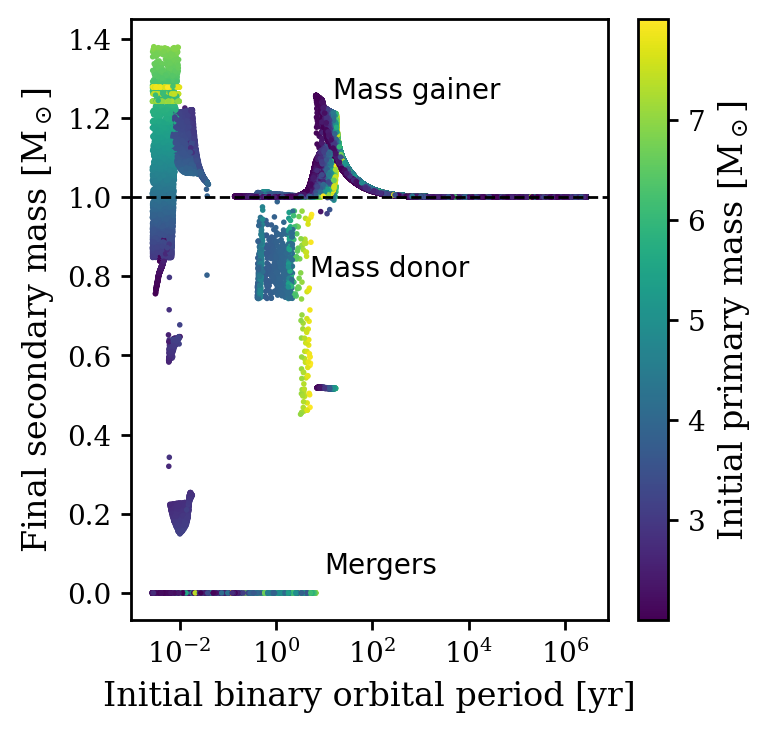

In [14]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(np.array(porbs)/365, fin_masses, c=pri_masses, s=1, zorder=-999)
plt.semilogx()
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')
plt.axhline(1, ls='--', c='k', lw=1)
#plt.axvline(1, ls='--', c='k', lw=1)
#plt.axvspan(0, 

plt.text(10, 0.05, 'Mergers', family='Sans')
plt.text(15, 1.25, 'Mass gainer', family='Sans')
plt.text(5, 0.8, 'Mass donor', family='Sans')
#plt.text(1.0, 0.3, 'No mass transfer', family='Sans', ha='center')

plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Final secondary mass [M$_\odot$]')
plt.tight_layout()
#plt.savefig('porb_msun.pdf', dpi=400)

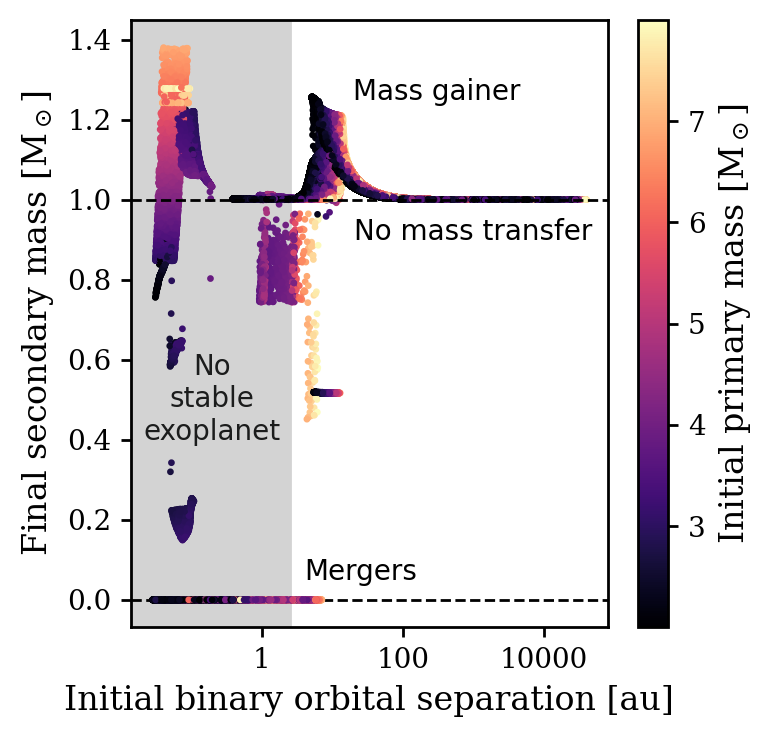

In [15]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(seps, fin_masses, c=pri_masses, s=2, zorder=-999, cmap='magma')
plt.semilogx()
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')
plt.axhline(1, ls='--', c='k', lw=1)
plt.axhline(0, ls='--', c='k', lw=1, zorder=-9999)
#plt.axvline(1, ls='--', c='k', lw=1)
plt.axvspan(0, 2.5, color='lightgray', zorder=-999999)

plt.text(4, 0.05, 'Mergers', family='Sans')
plt.text(20, 1.25, 'Mass gainer', family='Sans')
#plt.text(5, 0.8, 'Mass donor', family='Sans')
plt.text(1e3, 0.9, 'No mass transfer', family='Sans', ha='center')
plt.text(0.2, 0.4, 'No\nstable\nexoplanet', c='#1b1c1c', family='Sans', ha='center')
#plt.gca().set_xticks([1, 100, 10000], [r'$1$', r'$100$', r'$10,000$'])
plt.gca().set_xticks([1, 100, 10000], [1, 100, 10000])

plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Final secondary mass [M$_\odot$]')
plt.tight_layout()
plt.savefig('sep_msun.pdf', dpi=400)

In [16]:
np.max(porbs)/365

2739347.2137933173

In [17]:
2.7e6

2700000.0

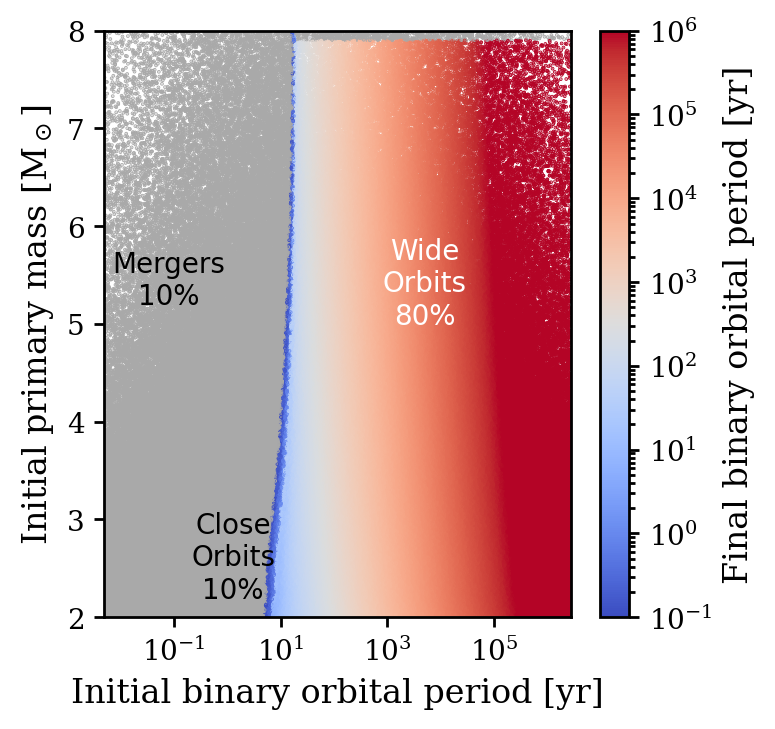

In [18]:
norm = mcolors.LogNorm(vmin=0.1, vmax=1e6)
cmap = plt.cm.coolwarm
cmap.set_under('darkgray') 

mod_fin_porbs = np.array(fin_porbs)
mod_fin_porbs[mod_fin_porbs<0.1] = 0.09

plt.gca().set_rasterization_zorder(-99)
scatter = plt.scatter(np.array(porbs) / 365, pri_masses, c=mod_fin_porbs / 365, cmap=cmap, norm=norm, s=0.1, zorder=-999)
plt.semilogx()
cbar = plt.colorbar(scatter, label=r'Final binary orbital period [yr]')
#cbar.set_ticks([0, 1, 10, 100, 1000, 10000])
#cbar.ax.set_yticklabels(['0', '1', '10', '100', '1000', '10000'])
plt.text(8e-2, 5.2, 'Mergers\n10%', family='Sans', ha='center')
plt.text(1.3, 2.2, 'Close\nOrbits\n10%', family='Sans', ha='center')
plt.text(5e3, 5, 'Wide\nOrbits\n80%', family='Sans', c='white', ha='center')

plt.xlim([5e-3, 2.7e6])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
plt.savefig('init_final_porb.pdf', dpi=400)

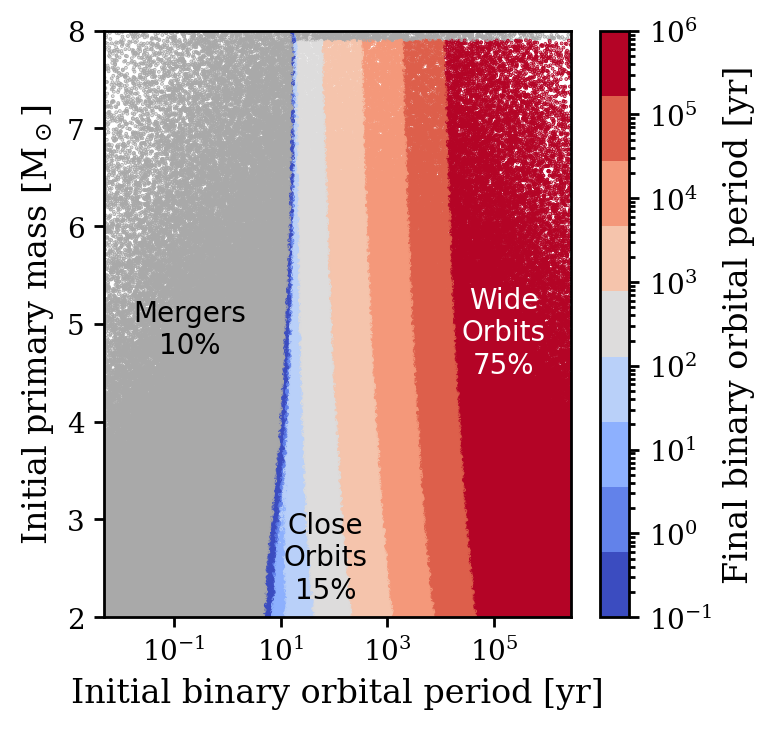

In [195]:
norm = mcolors.LogNorm(vmin=0.1, vmax=1e6)
cmap = mcolors.ListedColormap(plt.colormaps['coolwarm'](np.linspace(0, 1, 9)))
cmap.set_under('darkgray') 

mod_fin_porbs = np.array(fin_porbs)
mod_fin_porbs[mod_fin_porbs<0.1] = 0.09

plt.gca().set_rasterization_zorder(-99)
scatter = plt.scatter(np.array(porbs) / 365, pri_masses, c=mod_fin_porbs / 365, cmap=cmap, norm=norm, s=0.1, zorder=-999)
plt.semilogx()
cbar = plt.colorbar(scatter, label=r'Final binary orbital period [yr]')
#cbar.set_ticks([0, 1, 10, 100, 1000, 10000])
#cbar.ax.set_yticklabels(['0', '1', '10', '100', '1000', '10000'])
plt.text(2e-1, 4.7, 'Mergers\n10%', family='Sans', ha='center')
plt.text(70, 2.2, 'Close\nOrbits\n15%', family='Sans', ha='center')
plt.text(1.5e5, 4.5, 'Wide\nOrbits\n75%', family='Sans', c='white', ha='center')

plt.xlim([5e-3, 2.7e6])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
plt.savefig('init_final_porb.pdf', dpi=400)

In [189]:
np.array(init_sep).max()

40027.2989668252

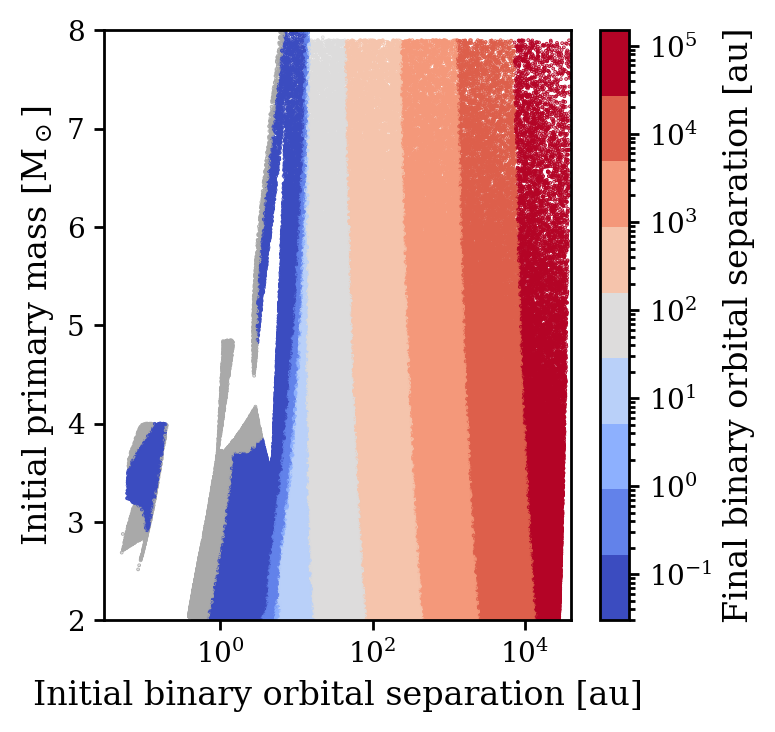

In [190]:
norm = mcolors.LogNorm(vmin=0.03, vmax=150000)
cmap = mcolors.ListedColormap(plt.colormaps['coolwarm'](np.linspace(0, 1, 9)))
cmap.set_under('darkgray') 

#mod_fin_porbs = np.array(fin_porbs)
#mod_fin_porbs[mod_fin_porbs<0.1] = 0.09

plt.gca().set_rasterization_zorder(-99)
scatter = plt.scatter(init_sep, pri_masses, c=fin_sep, cmap=cmap, norm=norm, s=0.1, zorder=-999)
plt.semilogx()
cbar = plt.colorbar(scatter, label=r'Final binary orbital separation [au]')
#cbar.set_ticks([0, 1, 10, 100, 1000, 10000])
#cbar.ax.set_yticklabels(['0', '1', '10', '100', '1000', '10000'])
#plt.text(2e-1, 4.7, 'Mergers\n10%', family='Sans', ha='center')
#plt.text(70, 2.2, 'Close\nOrbits\n15%', family='Sans', ha='center')
#plt.text(1.5e5, 4.5, 'Wide\nOrbits\n75%', family='Sans', c='white', ha='center')

plt.xlim([0.03, 40000])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
#plt.savefig('init_final_sep.pdf', dpi=400)

In [19]:
fin_porbs = np.array(fin_porbs)
N = len(fin_porbs)/100
print('mergers', np.sum(fin_porbs/365<=1e-3)/N)
print('wide orbits', np.sum(fin_porbs/365>=2.5)/N)
print('close orbits', np.sum(np.logical_and(fin_porbs/365>1e-3, fin_porbs/365<2.5)/N))

mergers 10.6758
wide orbits 72.4216
close orbits 16.902600000000003


In [196]:
init_seps = np.array(init_sep)
print('unstable from beginning', np.sum(init_seps < 2.5)/N)

unstable from beginning 18.1076


In [199]:
later_unstable = bpp.groupby('bin_num').filter(lambda g: (g['dist_au'].iloc[0] >= 2.5) and (g['dist_au'] < 2.5).any())['bin_num'].unique()
len(later_unstable)/N

9.4711

In [192]:
fin_seps = np.array(fin_sep)
N = len(fin_seps)/100
print('mergers', np.sum(fin_porbs/365<=1e-3)/N)
print('wide orbits', np.sum(fin_seps>=2.5)/N)
print('close orbits', np.sum(np.logical_and(fin_porbs/365>1e-3, fin_seps<2.5)/N))

mergers 10.6758
wide orbits 72.4216
close orbits 16.902600000000003


In [193]:
11+72+17

100

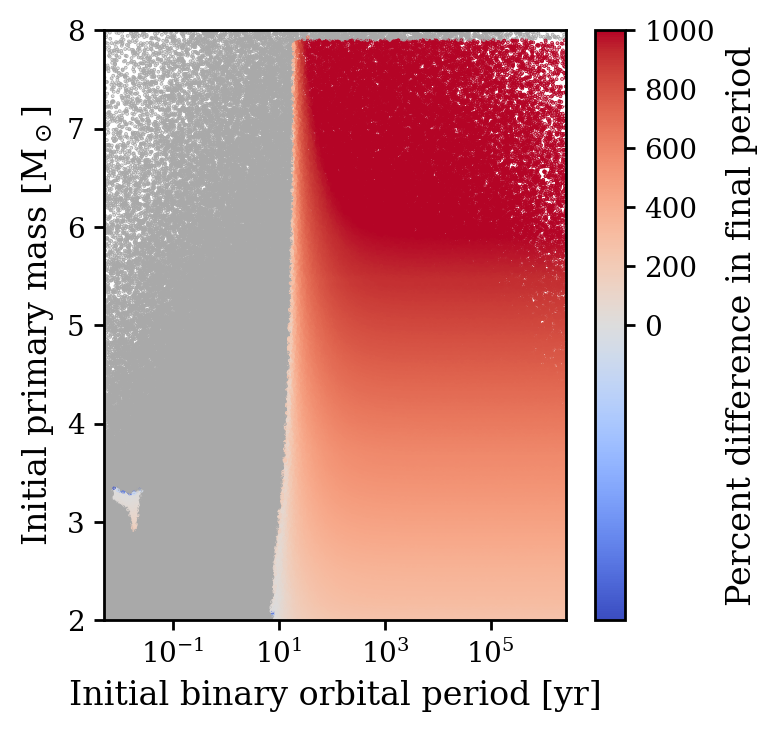

In [20]:
percent_diff = ((np.array(fin_porbs) - np.array(porbs)) / np.array(porbs)) * 100
cmap = plt.cm.coolwarm
cmap.set_under('darkgray')

from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=1000)

plt.gca().set_rasterization_zorder(-99)
scatter = plt.scatter(np.array(porbs)/365, pri_masses, c=percent_diff, cmap=cmap, norm=norm, s=0.1, zorder=-999)
plt.semilogx()
cbar = plt.colorbar(scatter, label='Percent difference in final period')
plt.xlim([5e-3, 2.7e6])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
#plt.savefig('percent_diff_porb.pdf', dpi=400)

(2.0, 8.0)

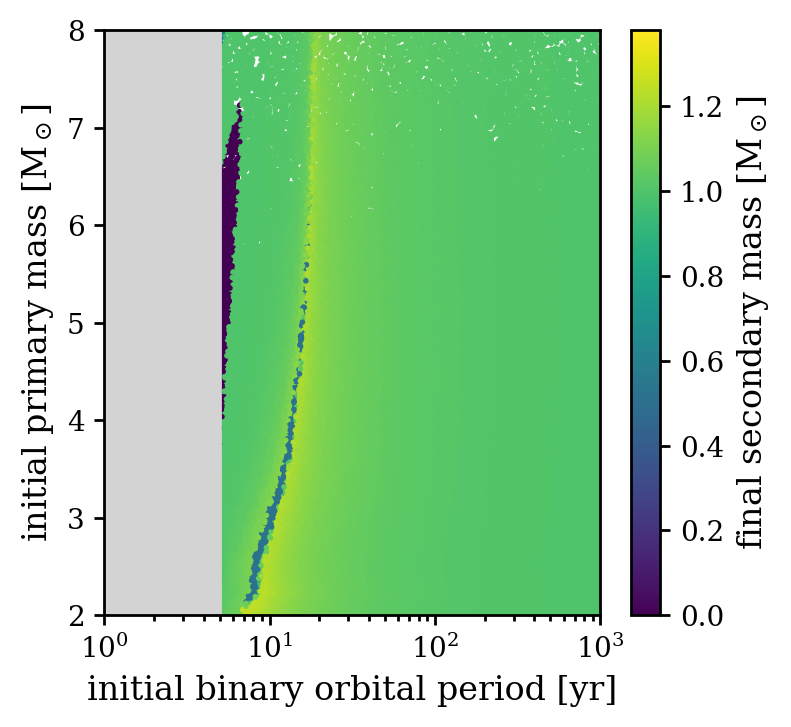

In [21]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(np.array(porbs)/365, pri_masses, c=fin_masses, s=1, zorder=-999, cmap='viridis')
plt.colorbar(label=r'final secondary mass [M$_\odot$]')
plt.semilogx()
plt.xlabel('initial binary orbital period [yr]')
plt.ylabel(r'initial primary mass [M$_\odot$]')

plt.axvspan(1e-1, 5, color='lightgray', zorder=-99)

plt.xlim([1, 1e3])
plt.ylim([2, 8])

In [22]:
np.max(fin_masses)

1.3798723134074706

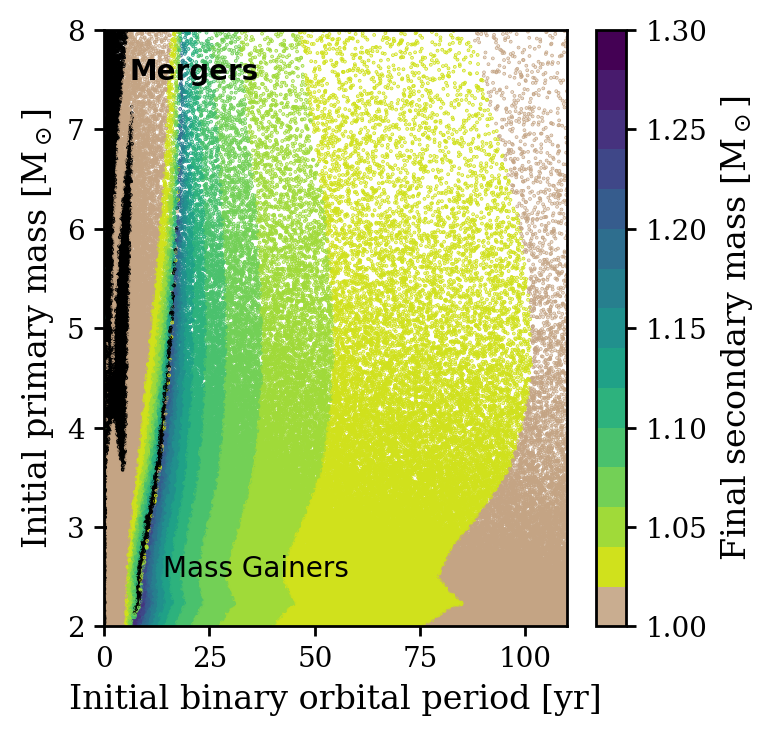

In [23]:
#norm = mcolors.TwoSlopeNorm(vmin=0.9, vcenter=1, vmax=1.4)

norm = mcolors.Normalize(vmin=1, vmax=1.3)
cmap = plt.colormaps['viridis_r']

new_colors = cmap(np.linspace(0, 1, 15))
white_color = [0.7686, 0.6431, 0.5176, 0.9]#[0.9, 0.5, 0.5, 0.5]
new_colors[0] = white_color
cmap = mcolors.ListedColormap(new_colors)

cmap.set_under('k') 

plt.gca().set_rasterization_zorder(-99)
sc = plt.scatter(np.array(porbs) / 365, pri_masses, c=fin_masses, s=0.1, zorder=-999, cmap=cmap, norm=norm)
cb = plt.colorbar(sc, label=r'Final secondary mass [M$_\odot$]')

plt.text(6, 7.5, 'Mergers', family='Sans', fontweight='bold')
plt.text(14, 2.5, 'Mass Gainers', family='Sans')

plt.xlim([0, 110])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
plt.savefig('init_final_mass.pdf', dpi=400)

(array([778142.,  57426.,  34898.,  22893.,  13334.,   9009.,   6863.,
          5479.,   5778.,   6313.]),
 array([1.00000003, 1.02751565, 1.05503128, 1.08254691, 1.11006254,
        1.13757816, 1.16509379, 1.19260942, 1.22012505, 1.24764067,
        1.2751563 ]),
 <BarContainer object of 10 artists>)

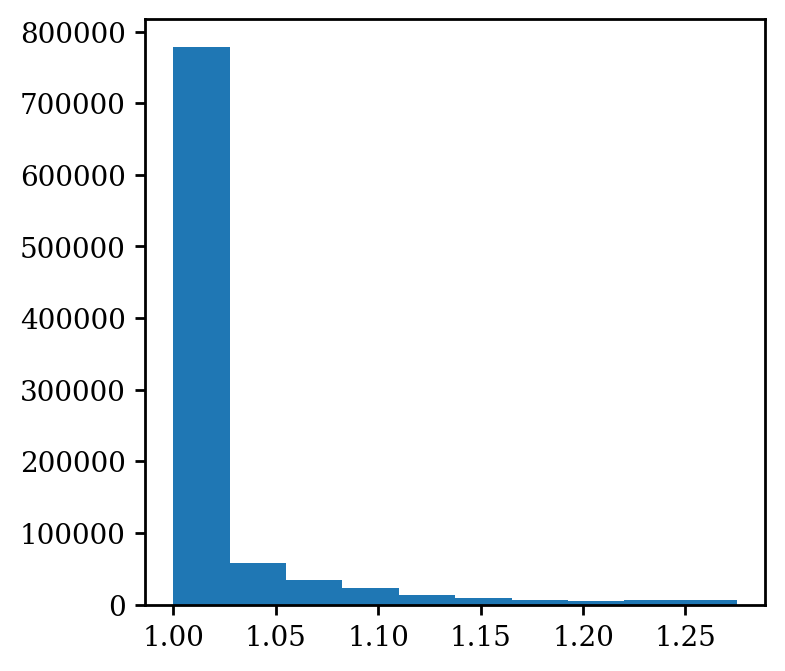

In [24]:
plt.hist(np.array(max_masses)[np.array(porbs)/365 > 0.1])

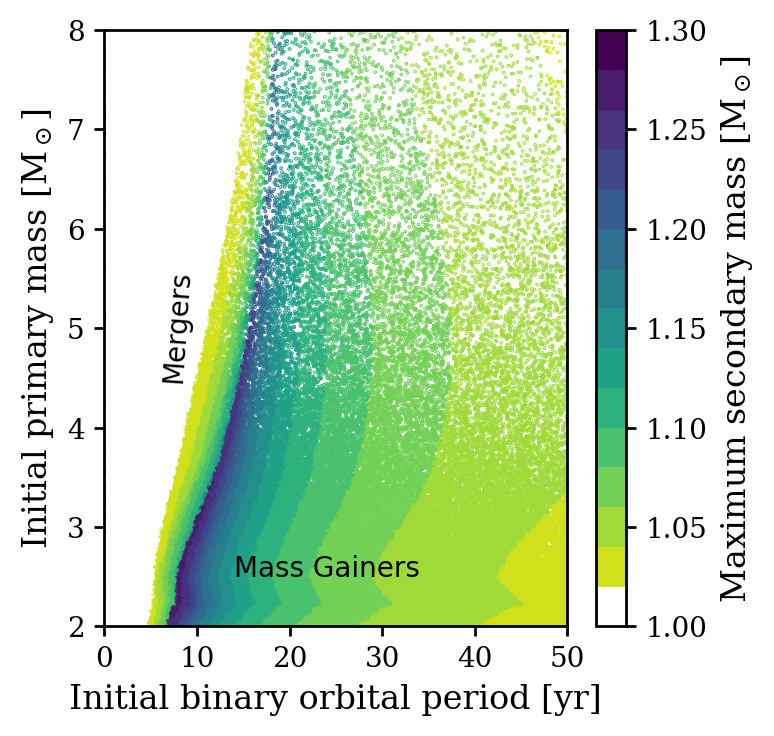

In [25]:
# create a custom colormap with black at 0, centered at 1, and diverging between 0 and 1.4
#norm = mcolors.TwoSlopeNorm(vmin=0.9, vcenter=1, vmax=1.4)

norm = mcolors.Normalize(vmin=1, vmax=1.3)
#norm = mcolors.TwoSlopeNorm(vmin=0.98, vcenter=1, vmax=1.4)
#cmap = plt.colormaps['PuRd']#['coolwarm']
cmap = plt.colormaps['viridis_r']#['coolwarm']
#cmap = plt.colormaps['coolwarm']

new_colors = cmap(np.linspace(0, 1, 15))
white_color = [1, 1, 1, 1]
new_colors[0] = white_color
cmap = mcolors.ListedColormap(new_colors)

cmap.set_under('k') 

plt.gca().set_rasterization_zorder(-99)
sc = plt.scatter(np.array(porbs) / 365, pri_masses, c=max_masses, s=0.1, zorder=-999, cmap=cmap, norm=norm)
cb = plt.colorbar(sc, label=r'Maximum secondary mass [M$_\odot$]')

plt.text(6, 4.5, 'Mergers', family='Sans', rotation=86)
plt.text(14, 2.5, 'Mass Gainers', family='Sans')

plt.xlim([0, 50])
#plt.xlim([1, 8e2])
#plt.ylim([2, 8])
#plt.xlim([5e-3, 1e3])
plt.ylim([2, 8])
plt.xlabel('Initial binary orbital period [yr]')
plt.ylabel(r'Initial primary mass [M$_\odot$]')
plt.tight_layout()
#plt.savefig('init_final_mass.pdf', dpi=400)

Text(0.5, 0, 'final secondary mass [M$_\\odot$]')

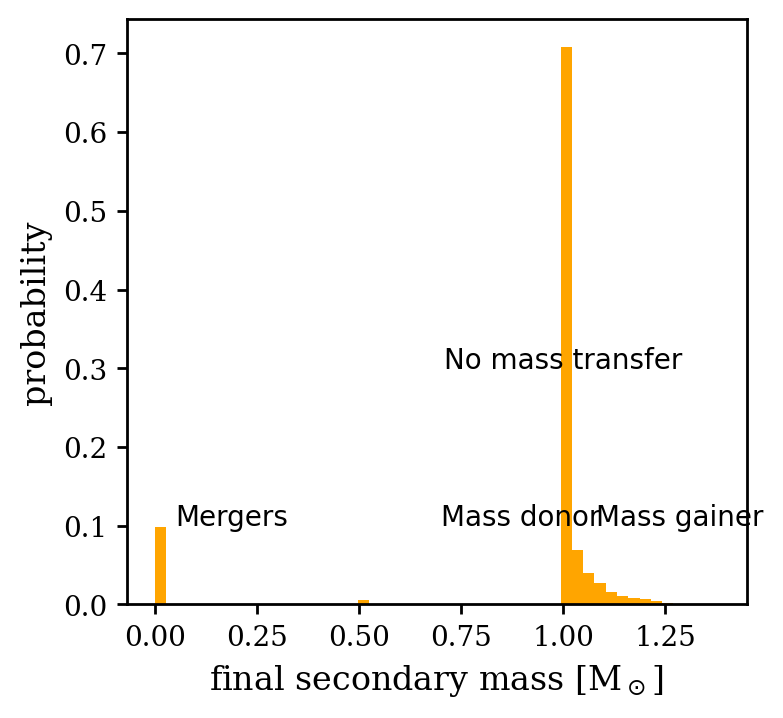

In [26]:
weights = np.ones_like(fin_masses) / (len(fin_masses))
n, bins, patches = plt.hist(np.array(fin_masses), bins=50, color='orange', weights=weights)
plt.text(0.05, 0.1, 'Mergers', family='Sans')
plt.text(0.7, 0.1, 'Mass donor', family='Sans')
plt.text(1.08, 0.1, 'Mass gainer', family='Sans')
plt.text(1.0, 0.3, 'No mass transfer', family='Sans', ha='center')
plt.ylabel('probability')
plt.xlabel(r'final secondary mass [M$_\odot$]')
#plt.savefig('prob_msun.pdf', dpi=400)

In [27]:
bpp['F2'] = bpp['lum_2'] * Lsun / (4 * np.pi * au_cm**2) #bcm['F1'] = Lsun / (4 * np.pi * au_cm**2)
bpp['F1'] = np.nan

In [28]:
valid_bin_nums = (
    bpp.groupby('bin_num')
    .filter(lambda group: (group['mass_2'] >= 0.99).all() and 
                          (group['mass_2'] <= 1.01).all() and 
                          (group['dist_au'] > 2.5).all())
    ['bin_num'].unique()
)
valid_bpp = bpp.copy()[bpp['bin_num'].isin(valid_bin_nums)]

In [29]:
valid_dist_mask = valid_bpp['dist_au'] > 0
valid_bpp.loc[valid_dist_mask, 'F1'] = (
    valid_bpp.loc[valid_dist_mask, 'lum_1'] * Lsun / (4 * np.pi * valid_bpp.loc[valid_dist_mask, 'dist']**2)
)
valid_bpp['F_total'] = valid_bpp['F1'] + valid_bpp['F2']
valid_bpp['Tearth'] = ((1 / (4 * sigma_sb)) * (1 - 0.3) * valid_bpp['F_total']) ** (1 / 4)

In [70]:
valid_bpp['F2_far'] = valid_bpp['lum_2'] * Lsun / (4 * np.pi * 1.7*au_cm**2)
valid_bpp['F1_far'] = valid_bpp['lum_1'] * Lsun / (4 * np.pi * valid_bpp['dist']**2)
valid_bpp['F_total_far'] = valid_bpp['F1_far'] + valid_bpp['F2_far']

In [72]:
valid_grouped = valid_bpp.groupby('bin_num')
max_tearths = valid_grouped['Tearth'].max().tolist()
porbs_tearth = valid_grouped['porb'].first().tolist()
m1s_tearth = valid_grouped['mass0_1'].first().tolist()

In [88]:
max_porbs_tearth = valid_grouped['porb'].last().tolist()

In [ ]:
#habitable_bin_nums = (
#    valid_bpp.groupby('bin_num')
#    .filter(lambda group: (group['mass_2'] >= 0.99).all() and 
#                          (group['mass_2'] <= 1.001).all() and 
#                          (group['dist_au'] > 2.5).all())
#    ['bin_num'].unique()
#)

In [30]:
final_porbs_tearth = valid_grouped['porb'].last().tolist()
final_dists_tearth = valid_grouped['dist_au'].last().tolist()

In [31]:
#valid_bpp['F_total'] = valid_bpp['F1'] + F_solar #valid_bpp['F2']

In [32]:
len(m1s_tearth)

514413

In [33]:
np.max(valid_grouped['F1'].max()/F_solar)

7.586660653978489

In [86]:
np.max(valid_grouped['F1'].max()/F_solar)

7.586660653978489

In [85]:
((max_Ftotal-F_solar)/F_solar).max()

7.21683703790158

In [59]:
max_Ftotal = np.array(valid_grouped['F_total'].max().tolist())
#max_Ftotal = np.array(valid_grouped['F2'].max().tolist())

In [90]:
max_idx = valid_grouped['F_total'].idxmax()
max_Ftotal_porbs = valid_bpp.loc[max_idx, 'porb'].tolist()

In [73]:
max_Ftotal_far = np.array(valid_grouped['F_total_far'].max().tolist())

In [201]:
len(valid_grouped)/N

51.4413

In [205]:
np.sum((max_Ftotal - F_solar)/F_solar > 0.06) / len(valid_grouped)

0.23638205099793358

In [206]:
np.sum((max_Ftotal - F_solar)/F_solar > 0.06) / N

12.1598

In [35]:
tearth_bb = ( 1/(4*sigma_sb) * (1-0.3) * Lsun / (4*np.pi*au_cm**2) )**(1/4) - 273.15
tearth_bb

-18.564075809361526

In [36]:
final_porbs_tearth = valid_grouped['porb'].last().tolist()
seps_tearth = valid_grouped['dist_au'].first().tolist()
final_seps_tearth = valid_grouped['dist_au'].last().tolist()

In [37]:
np.min(porbs_tearth)

50724.53233398142

In [38]:
valid_bpp.Tearth.max()

431.03303531533726

In [172]:
threshold_mask = ((max_Ftotal - F_solar)/F_solar >= 1e-3) & ((max_Ftotal - F_solar)/F_solar <= 0.06)
porb_mask = (np.array(max_Ftotal_porbs) < 2000*365) & (np.array(max_Ftotal_porbs) > 1000*365)
valid_bin_nums_filtered = valid_grouped['bin_num'].first()[threshold_mask & porb_mask].tolist()
len(valid_bin_nums_filtered)

1895

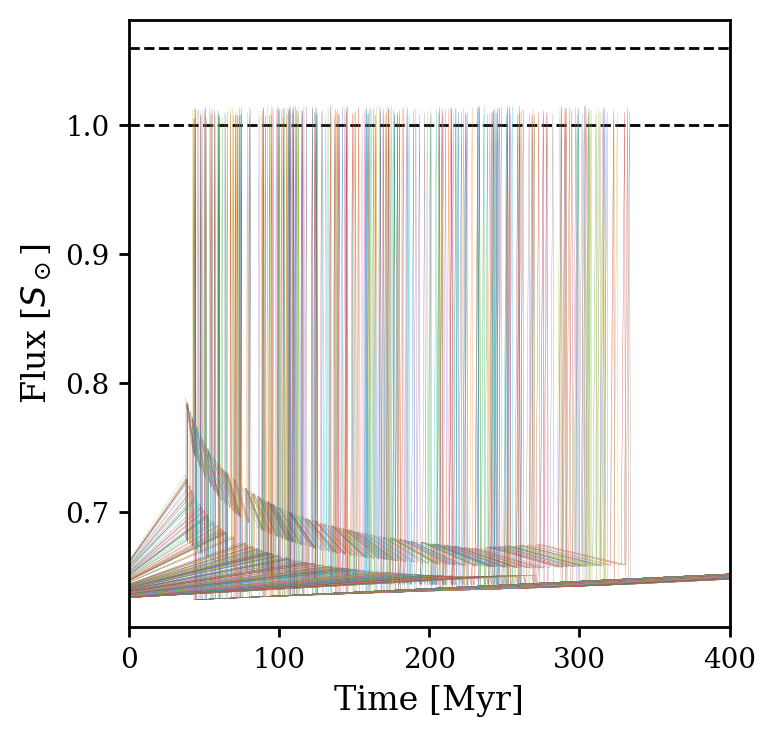

In [159]:
for bin_num in valid_bin_nums_filtered:
    bin = valid_bpp[valid_bpp.bin_num == bin_num]
    plt.plot(bin.tphys, (bin.F1+bin.F2)/F_solar, lw=0.1)

plt.axhline(1.06, ls='--', c='k', zorder=-99, lw=1)
plt.axhline(1, ls='--', c='k', zorder=-99, lw=1)
plt.xlim([0, 400])

plt.xlabel('Time [Myr]')
plt.ylabel(r'Flux [$S_\odot$]')
plt.tight_layout()

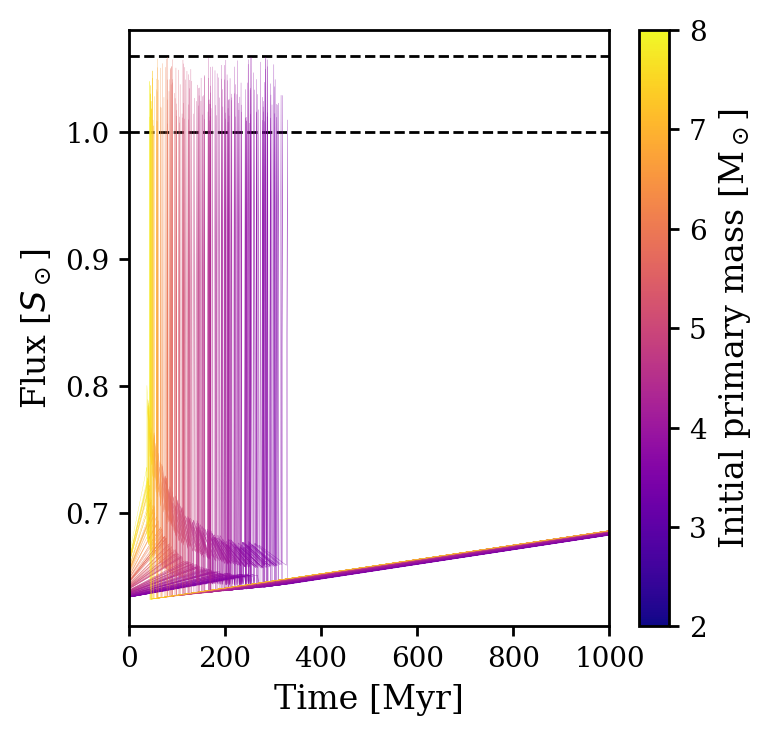

In [175]:
from matplotlib.cm import ScalarMappable

norm = mcolors.Normalize(vmin=2, vmax=8)
cmap = plt.colormaps['plasma']
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for bin_num in valid_bin_nums_filtered[::10]:
    bin = valid_bpp[valid_bpp.bin_num == bin_num]
    mass_1 = bin.mass_1.values[0]
    color = cmap(norm(mass_1))
    plt.plot(bin.tphys, (bin.F1 + bin.F2) / F_solar, lw=0.1, color=color)

plt.axhline(1.06, ls='--', c='k', zorder=-99, lw=1)
plt.axhline(1, ls='--', c='k', zorder=-99, lw=1)

plt.colorbar(sm, label=r'Initial primary mass [M$_\odot$]', ax=plt.gca())

plt.xlim([0, 1000])
plt.xlabel('Time [Myr]')
plt.ylabel(r'Flux [$S_\odot$]')
plt.tight_layout()

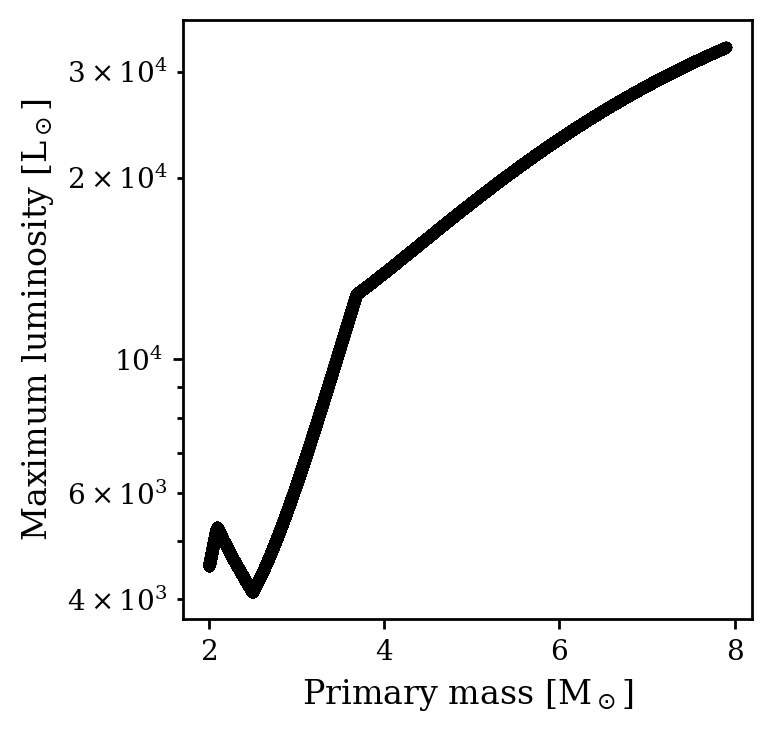

In [143]:
plt.plot(valid_grouped['mass_1'].max(), valid_grouped['lum_1'].max(), 'k.')
plt.xlabel(r'Primary mass [M$_\odot$]')
plt.ylabel(r'Maximum luminosity [L$_\odot$]')
plt.semilogy()
plt.tight_layout()

In [39]:
max_Ftotal/F_solar

array([1.00262461, 2.57739779, 3.36593166, ..., 0.99994409, 1.45722775,
       0.99993405])

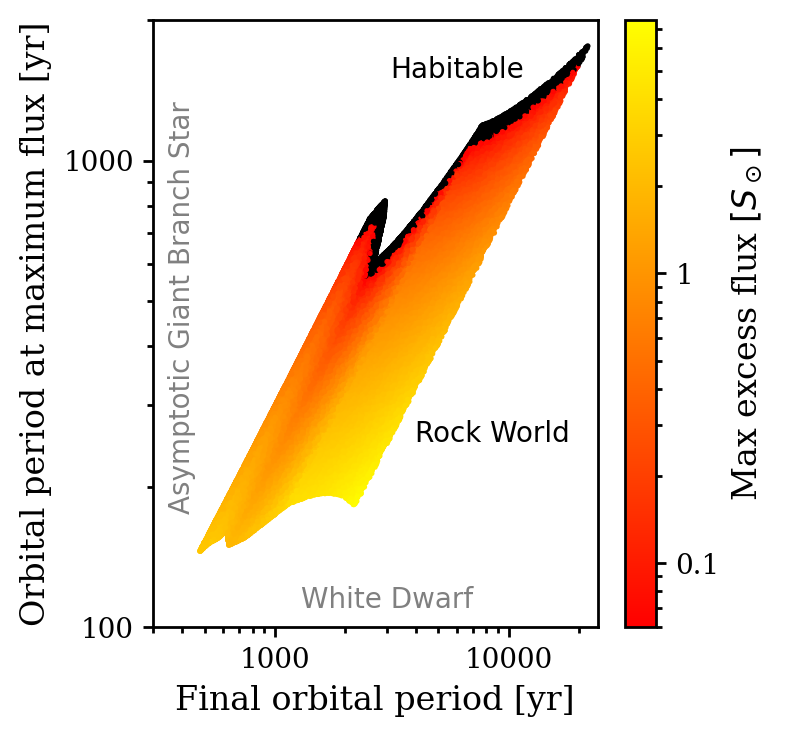

In [144]:
norm = mcolors.LogNorm(vmin=0.06, vmax=7.5)
cmap = plt.colormaps['autumn']
cmap.set_under('black') 
plt.gca().set_rasterization_zorder(-99)
plt.scatter(np.array(final_porbs_tearth)/365, np.array(max_Ftotal_porbs)/365, c=(max_Ftotal-F_solar)/F_solar, s=1, zorder=-999, cmap=cmap, norm=norm)
cbar = plt.colorbar(label=r'Max excess flux $[S_\odot]$')
cbar.ax.set_yticks([0.1, 1], [0.1, 1])
#cbar.ax.set_yticklabels([0.1, 1])

plt.text(3000, 110, 'White Dwarf', family='Sans', ha='center', color='gray')
plt.text(400, 180, 'Asymptotic Giant Branch Star', family='Sans', ha='center', rotation=90, color='gray')
plt.text(6000, 1500, 'Habitable', family='Sans', ha='center', color='k')
plt.text(8500, 250, 'Rock World', family='Sans', ha='center', color='k')

plt.ylim([100, 2000])
plt.xlim([300, 24000])
plt.semilogy()
plt.semilogx()
plt.gca().set_xticks([10**3, 10**4], [10**3, 10**4])
plt.gca().set_yticks([10**2, 10**3], [10**2, 10**3])

plt.ylabel('Orbital period at maximum flux [yr]')
plt.xlabel(r'Final orbital period [yr]') 
plt.tight_layout()
plt.savefig('porb_final_max.pdf', dpi=400)

array([ 2.62461395e-03,  1.57739779e+00,  2.36593166e+00, ...,
       -5.59052954e-05,  4.57227747e-01, -6.59518811e-05])

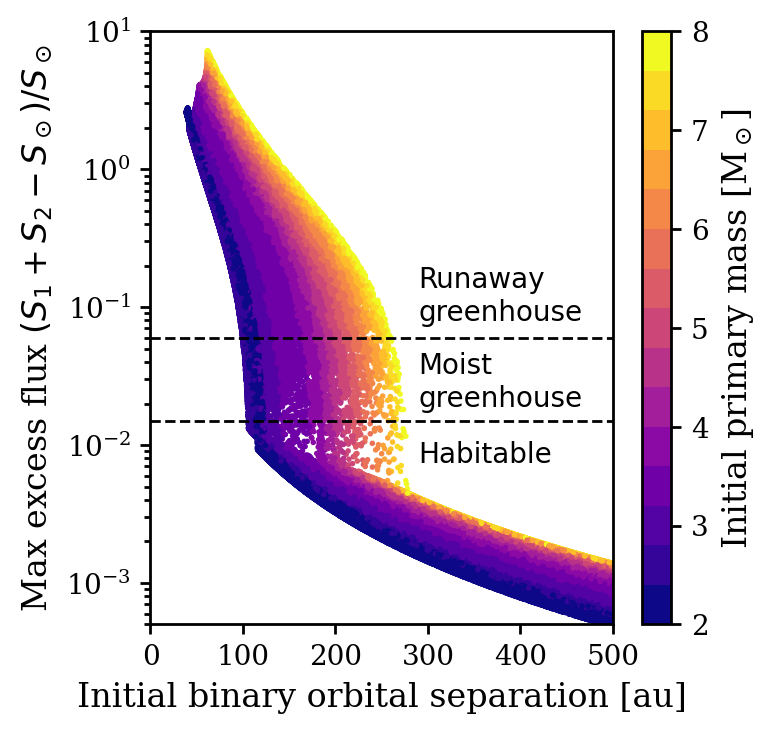

In [60]:
norm = mcolors.Normalize(vmin=2, vmax=8)
cmap = mcolors.ListedColormap(plt.colormaps['plasma'](np.linspace(0, 1, 15)))

plt.gca().set_rasterization_zorder(-99)
plt.scatter(seps_tearth, (max_Ftotal-F_solar)/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap=cmap, norm=norm)
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

plt.text(290, 0.08, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 1.9e-2, 'Moist\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 7.5e-3, 'Habitable', family='sans', zorder=9999, ha='left')

plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)

plt.xlim(0, 500)
plt.semilogy()
plt.ylim(5e-4, 10)

plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Max excess flux $(S_1 + S_2 - S_\odot) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
#plt.savefig('max_flux_sep_msun.pdf', dpi=400)

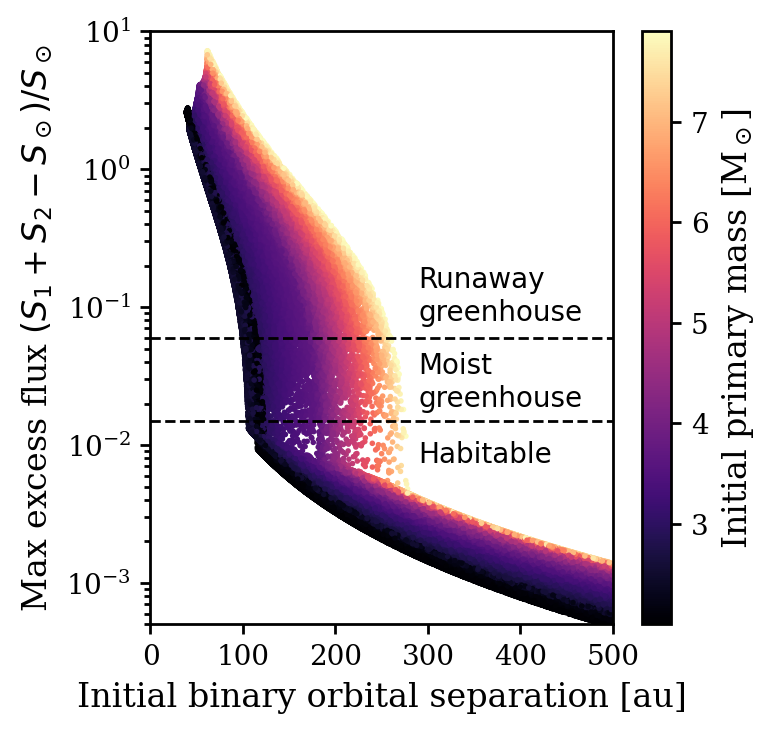

In [181]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(seps_tearth, (max_Ftotal-F_solar)/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap='magma')
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

plt.text(290, 0.08, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 1.9e-2, 'Moist\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 7.5e-3, 'Habitable', family='sans', zorder=9999, ha='left')

plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)

plt.xlim(0, 500)
plt.semilogy()
plt.ylim(5e-4, 10)

plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Max excess flux $(S_1 + S_2 - S_\odot) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
plt.savefig('max_flux_sep_msun.pdf', dpi=400)

7.21683703790158

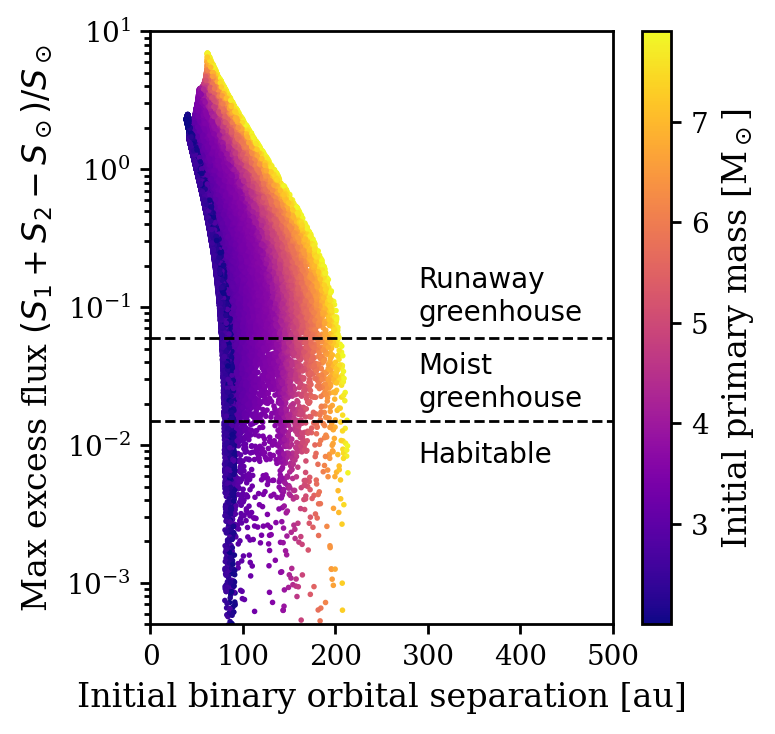

In [74]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(seps_tearth, (max_Ftotal_far-F_solar)/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap='plasma')
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

plt.text(290, 0.08, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 1.9e-2, 'Moist\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(290, 7.5e-3, 'Habitable', family='sans', zorder=9999, ha='left')

plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)

plt.xlim(0, 500)
plt.semilogy()
plt.ylim(5e-4, 10)

plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Max excess flux $(S_1 + S_2 - S_\odot) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
#plt.savefig('max_flux_sep_msun.pdf', dpi=400)

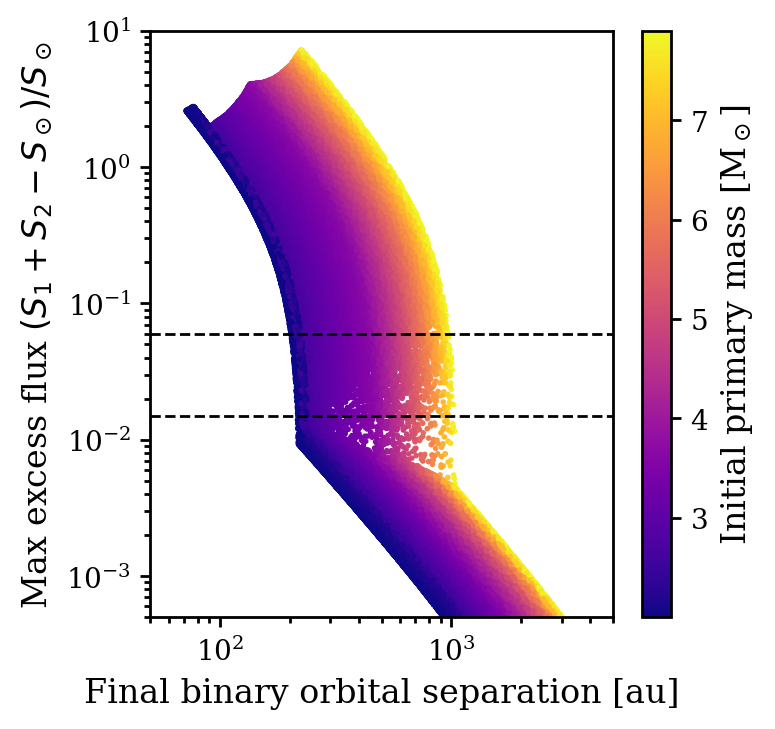

In [42]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(final_seps_tearth, (max_Ftotal-F_solar)/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap='plasma')
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

#plt.text(290, 0.08, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
#plt.text(290, 1.9e-2, 'Moist\ngreenhouse', family='sans', zorder=9999, ha='left')
#plt.text(290, 7.5e-3, 'Habitable', family='sans', zorder=9999, ha='left')

plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)

#plt.xlim(0, 500)
plt.xlim(5e1, 5e3)
plt.semilogx()
plt.semilogy()
plt.ylim(5e-4, 10)

plt.xlabel('Final binary orbital separation [au]')
plt.ylabel(r'Max excess flux $(S_1 + S_2 - S_\odot) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
#plt.savefig('max_flux_sep_msun.pdf', dpi=400)

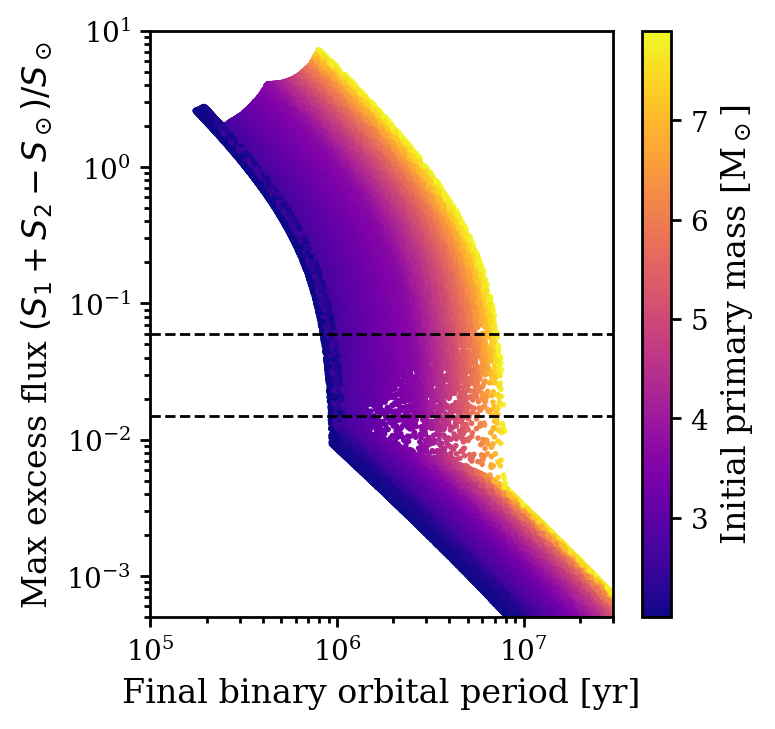

In [43]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(final_porbs_tearth, (max_Ftotal-F_solar)/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap='plasma')
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

#plt.text(290, 0.08, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
#plt.text(290, 1.9e-2, 'Moist\ngreenhouse', family='sans', zorder=9999, ha='left')
#plt.text(290, 7.5e-3, 'Habitable', family='sans', zorder=9999, ha='left')

plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)

plt.xlim([1e5, 3e7])

#plt.xlim(0, 500)
plt.semilogx()
plt.semilogy()
plt.ylim(5e-4, 10)

plt.xlabel('Final binary orbital period [yr]')
plt.ylabel(r'Max excess flux $(S_1 + S_2 - S_\odot) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
#plt.savefig('max_flux_sep_msun.pdf', dpi=400)

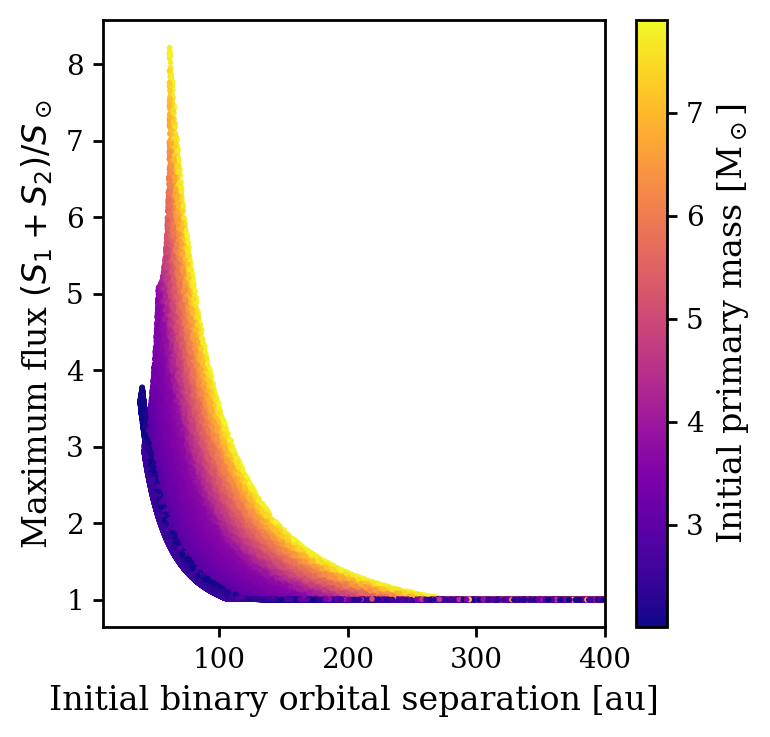

In [44]:
plt.gca().set_rasterization_zorder(-99)
plt.scatter(seps_tearth, max_Ftotal/F_solar, c=m1s_tearth, s=1, zorder=-999, cmap='plasma')
plt.colorbar(label=r'Initial primary mass [M$_\odot$]')

#plt.axvspan(0, 2.5, color='lightgray', zorder=-99)
#plt.axhline(100, ls='--', c='k', lw=1)
#plt.axhline(tearth_bb, ls='--', c='k', lw=1, zorder=-9)

#plt.text(15, tearth_bb-18, "Current Earth", family='Sans')
#plt.text(100, 105, "Oceans boil", family='Sans')
#plt.text(9, 150, 'Unstable Orbit', family='Sans', rotation=90)

#plt.xlim([0, 200])

plt.xlim(10, 400)
#plt.semilogx()
#plt.semilogy()

plt.xlabel('Initial binary orbital separation [au]')
plt.ylabel(r'Maximum flux $(S_1 + S_2) / S_\odot$') #[$^\circ$C]')
plt.tight_layout()
#plt.savefig('max_flux_sep_msun.pdf', dpi=400)

In [45]:
valid_bpp

tphys    mass_1  mass_2  kstar_1  kstar_2           sep  \
0           0.000000  3.476639     1.0      1.0      1.0  6.410713e+04   
1         265.301381  3.476317     1.0      2.0      1.0  6.411175e+04   
2         266.685629  3.476080     1.0      3.0      1.0  6.411514e+04   
3         268.108047  3.474592     1.0      4.0      1.0  6.413646e+04   
4         323.839513  3.435838     1.0      5.0      1.0  6.469684e+04   
...              ...       ...     ...      ...      ...           ...   
9022843   330.873694  3.212630     1.0      4.0      1.0  1.740070e+06   
9022844   404.928078  3.176931     1.0      5.0      1.0  1.754943e+06   
9022845   407.611666  3.139154     1.0      6.0      1.0  1.770961e+06   
9022846   408.413989  0.735448     1.0     11.0      1.0  4.251209e+06   
9022847  6652.000000  0.735448     1.0     11.0      1.0  4.251209e+06   

                 porb  ecc        RRLO_1        RRLO_2  ...       epoch_2  \
0        8.891103e+05  0.0  7.213528e-05  4.957897e-05  ...  0.000000e+00   
1        8.892383e+05  0.0  1.683650e-04  4.981158e-05  ...  0.000000e+00   
2        8.893324e+05  0.0  7.880022e-04  4.980928e-05  ...  1.096430e-08   
3        8.899240e+05  0.0  2.436738e-03  4.978830e-05  ...  1.077418e-06   
4        9.055426e+05  0.0  1.664151e-03  4.925886e-05  ...  2.225396e-05   
...               ...  ...           ...           ...  ...           ...   
9022843  1.296121e+08  0.0  8.004419e-05  1.799257e-06  ...  1.144940e-09   
9022844  1.318373e+08  0.0  5.465400e-05  1.781111e-06  ...  3.024900e-08   
9022845  1.342548e+08  0.0  3.939466e-04  1.759506e-06  ...  1.105085e-06   
9022846  7.711433e+08  0.0  7.382170e-09  5.157919e-07  ...  7.538302e-04   
9022847  7.711433e+08  0.0  7.382170e-09  5.978583e-07  ...  7.538302e-04   

         bhspin_1  bhspin_2  bin_num          dist       dist_au  \
0             0.0       0.0        0  4.459933e+15    298.128122   
1             0.0       0.0        0  4.460254e+15    298.149575   
2             0.0       0.0        0  4.460490e+15    298.165348   
3             0.0       0.0        0  4.461973e+15    298.264501   
4             0.0       0.0        0  4.500959e+15    300.870520   
...           ...       ...      ...           ...           ...   
9022843       0.0       0.0   999999  1.210567e+17   8092.138129   
9022844       0.0       0.0   999999  1.220914e+17   8161.306295   
9022845       0.0       0.0   999999  1.232058e+17   8235.797299   
9022846       0.0       0.0   999999  2.957566e+17  19770.109710   
9022847       0.0       0.0   999999  2.957566e+17  19770.109775   

                   F2            F1       F_total      Tearth  
0        8.556410e+05  2.068250e+03  8.577093e+05  226.825359  
1        8.679898e+05  5.444989e+03  8.734347e+05  227.857954  
2        8.680554e+05  2.746809e+03  8.708022e+05  227.686071  
3        8.681230e+05  1.498911e+04  8.831121e+05  228.486493  
4        8.707791e+05  7.774788e+03  8.785539e+05  228.191091  
...               ...           ...           ...         ...  
9022843  8.711158e+05  1.592580e+01  8.711317e+05  227.707606  
9022844  8.746821e+05  8.309003e+00  8.746904e+05  227.939802  
9022845  8.748120e+05  1.549729e+02  8.749670e+05  227.957822  
9022846  8.748530e+05  9.228190e-02  8.748531e+05  227.950399  
9022847  1.361077e+06  2.025331e-07  1.361077e+06  254.581726  

[4115304 rows x 50 columns]

In [75]:
valid_bpp.columns

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num', 'dist', 'dist_au', 'F2', 'F1',
       'F_total', 'Tearth', 'initial_porb', 'F2_far', 'F1_far', 'F_total_far'],
      dtype='object')

In [46]:
last_lum = valid_grouped['lum_2'].last().tolist()
last_teff = valid_grouped['teff_2'].last().tolist()
last_mass = valid_grouped['mass_2'].last().tolist()

Text(0, 0.5, 'Luminosity [L$_\\odot$]')

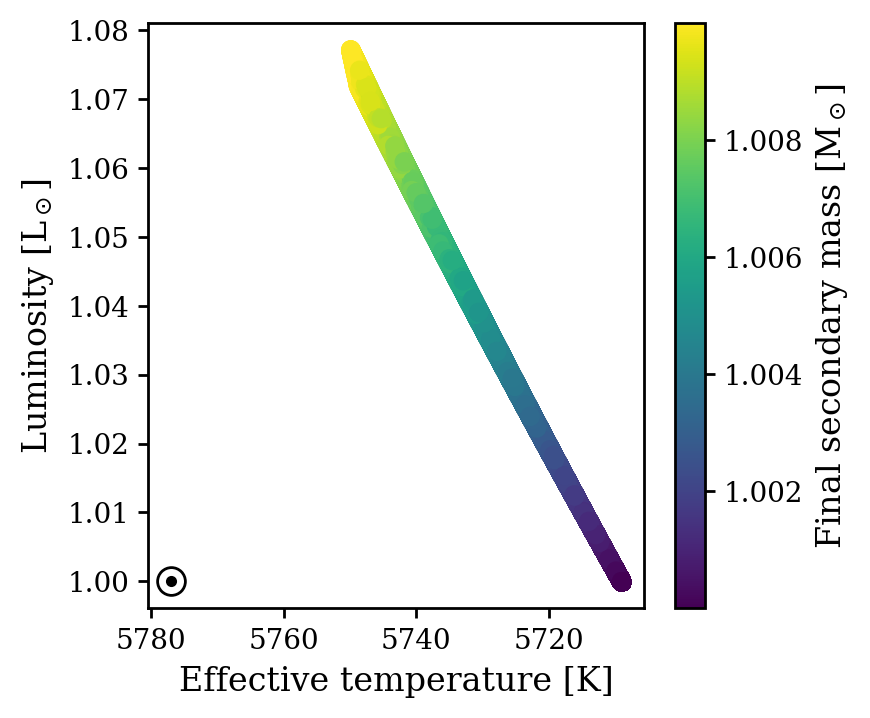

In [47]:
plt.scatter(last_teff, last_lum, c=last_mass)
plt.colorbar(label=r'Final secondary mass [M$_\odot$]')

plt.plot(5777, 1, 'k.')
plt.plot(5777, 1, 'ko', mfc='none', ms=10)
plt.gca().invert_xaxis()
#plt.semilogx()
#plt.semilogy()
plt.xlabel('Effective temperature [K]')
plt.ylabel(r'Luminosity [L$_\odot$]')

In [48]:
initial_porb_mapping = grouped['porb'].first()
valid_bpp = valid_bpp.merge(initial_porb_mapping.rename('initial_porb'), on='bin_num')

In [49]:
valid_bpp[(valid_bpp['Tearth']>10000) & (valid_bpp['initial_porb'] > 365*5)]

Empty DataFrame
Columns: [tphys, mass_1, mass_2, kstar_1, kstar_2, sep, porb, ecc, RRLO_1, RRLO_2, evol_type, aj_1, aj_2, tms_1, tms_2, massc_1, massc_2, rad_1, rad_2, mass0_1, mass0_2, lum_1, lum_2, teff_1, teff_2, radc_1, radc_2, menv_1, menv_2, renv_1, renv_2, omega_spin_1, omega_spin_2, B_1, B_2, bacc_1, bacc_2, tacc_1, tacc_2, epoch_1, epoch_2, bhspin_1, bhspin_2, bin_num, dist, dist_au, F2, F1, F_total, Tearth, initial_porb]
Index: []

[0 rows x 51 columns]

In [50]:
valid_bpp.lum_2.min()

0.6286086738225072

In [78]:
valid_bpp[valid_bpp.bin_num == valid_bpp.iloc[valid_bpp.lum_2.argmax()].bin_num].bin_num

4029200    979103
4029201    979103
4029202    979103
4029203    979103
4029204    979103
4029205    979103
4029206    979103
4029207    979103
Name: bin_num, dtype: int64

In [77]:
valid_bpp[valid_bpp.bin_num == valid_bpp.iloc[valid_bpp.mass_2.argmax()].bin_num].bin_num

75104    18031
75105    18031
75106    18031
75107    18031
75108    18031
75109    18031
75110    18031
75111    18031
Name: bin_num, dtype: int64

In [ ]:
valid_bpp[np.logical_and(np.logical_and(valid_bpp.porb/365 > 1, bpp.porb/365 < 2), bpp.mass_2 < 1.2)]

In [52]:
bpp[np.logical_and(np.logical_and(bpp.porb/365 > 1, bpp.porb/365 < 2), bpp.mass_2 < 1.2)]

tphys    mass_1    mass_2  kstar_1  kstar_2         sep  \
444         0.000000  2.365235  1.000000      1.0      1.0  480.508257   
445       763.888125  2.365235  1.000000      2.0      1.0  480.508257   
446       769.176581  2.365089  1.000000      3.0      1.0  480.529060   
447       777.164154  2.363637  1.000007      4.0      1.0  480.922854   
448       976.117408  2.332920  1.000114      5.0      1.0  488.010286   
...              ...       ...       ...      ...      ...         ...   
9022653   383.116401  3.239009  1.000196      5.0      1.0  436.076235   
9022654   385.398367  3.223486  1.000566      5.0      1.0  379.588892   
9022655   385.398367  3.223486  1.000566      5.0      1.0  379.588892   
9022816  1394.970794  2.030471  1.001172      5.0      1.0  471.580264   
9022817  1394.970794  2.030471  1.001172      5.0      1.0  471.580264   

               porb  ecc    RRLO_1    RRLO_2  ...  tacc_2   epoch_1   epoch_2  \
444      665.450516  0.0  0.008383  0.005980  ...     0.0  0.000000  0.000000   
445      665.450516  0.0  0.019245  0.006063  ...     0.0  0.000000  0.000000   
446      665.508175  0.0  0.046233  0.006063  ...     0.0 -0.134842  0.000175   
447      666.469494  0.0  0.188878  0.006058  ...     0.0 -0.134842  0.019905   
448      684.377489  0.0  0.147687  0.005972  ...     0.0 -0.134842  0.394789   
...             ...  ...       ...       ...  ...     ...       ...       ...   
9022653  512.594041  0.0  0.225999  0.007203  ...     0.0 -0.056489  0.258288   
9022654  417.040059  0.0  1.000994  0.008267  ...     0.0 -0.056489  0.810570   
9022655  417.040059  0.0  1.000994  0.008267  ...     0.0 -0.056489  0.810570   
9022816  681.658056  0.0  1.000989  0.006018  ...     0.0 -0.194462  6.277209   
9022817  681.658056  0.0  1.000989  0.006018  ...     0.0 -0.194462  6.277209   

         bhspin_1  bhspin_2  bin_num          dist   dist_au             F2  \
444           0.0       0.0       48  3.342896e+13  2.234588  855641.046672   
445           0.0       0.0       48  3.342896e+13  2.234588  892518.482232   
446           0.0       0.0       48  3.343041e+13  2.234685  892788.461743   
447           0.0       0.0       48  3.345780e+13  2.236516  893225.416086   
448           0.0       0.0       48  3.395088e+13  2.269476  904024.297910   
...           ...       ...      ...           ...       ...            ...   
9022653       0.0       0.0   999978  3.033782e+13  2.027958  874475.545366   
9022654       0.0       0.0   999978  2.640800e+13  1.765266  876186.889760   
9022655       0.0       0.0   999978  2.640800e+13  1.765266  876186.889760   
9022816       0.0       0.0   999996  3.280784e+13  2.193069  931692.899766   
9022817       0.0       0.0   999996  3.280784e+13  2.193069  931692.899766   

         F1  
444     NaN  
445     NaN  
446     NaN  
447     NaN  
448     NaN  
...      ..  
9022653 NaN  
9022654 NaN  
9022655 NaN  
9022816 NaN  
9022817 NaN  

[247719 rows x 48 columns]

In [81]:
bin1.columns

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num', 'dist', 'dist_au', 'F2', 'F1'],
      dtype='object')

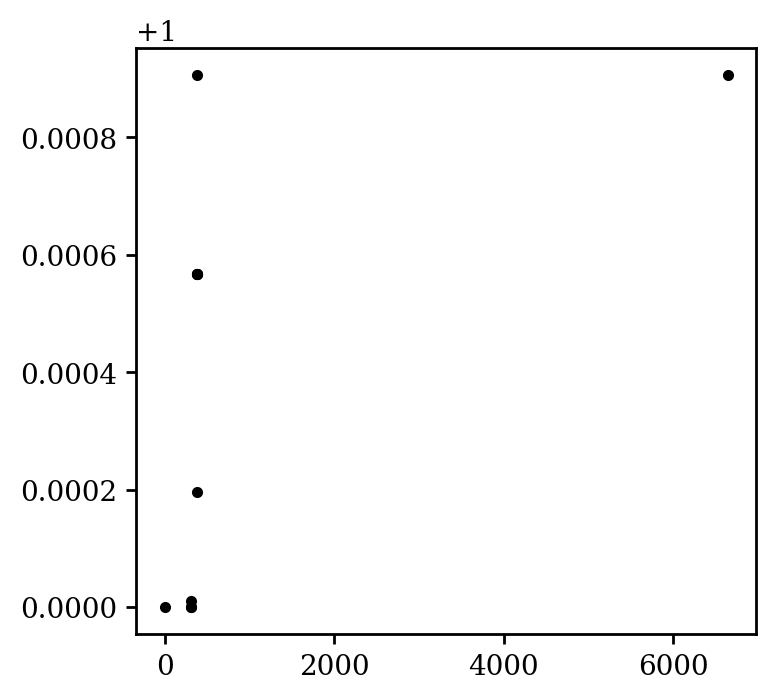

In [80]:
bin1 = 18031
bin1 = bpp[bpp.bin_num==bn]
plt.plot(bin1.tphys, bin1.mass_2, 'k.')

/tmp/ipykernel_35111/2545982984.py:4: RuntimeWarning: invalid value encountered in divide
  mass_gain_rate = delta_mass / delta_time_years  # Rate in solar masses per year


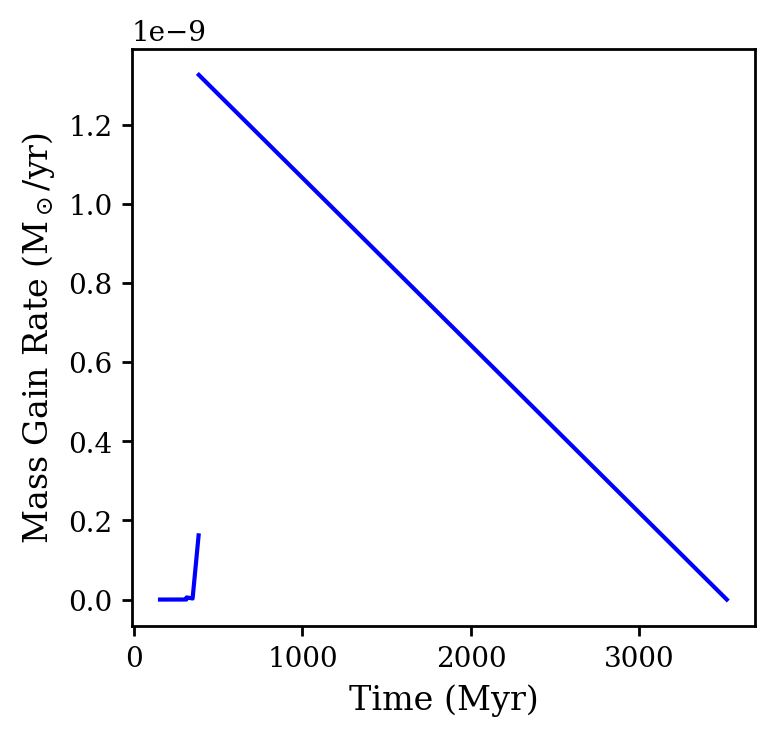

In [83]:
delta_mass = np.diff(bin1.mass_2)
delta_time_myr = np.diff(bin1.tphys)
delta_time_years = delta_time_myr * 1e6  # Convert time from Myr to years
mass_gain_rate = delta_mass / delta_time_years  # Rate in solar masses per year

tphys_midpoints = bin1.tphys[:-1] + delta_time_myr / 2

plt.plot(tphys_midpoints, mass_gain_rate, 'b-')
plt.xlabel('Time (Myr)')
plt.ylabel(r'Mass Gain Rate (M$_\odot$/yr)')
plt.tight_layout()

Text(0, 0.5, 'luminosity [L$_\\odot$]')

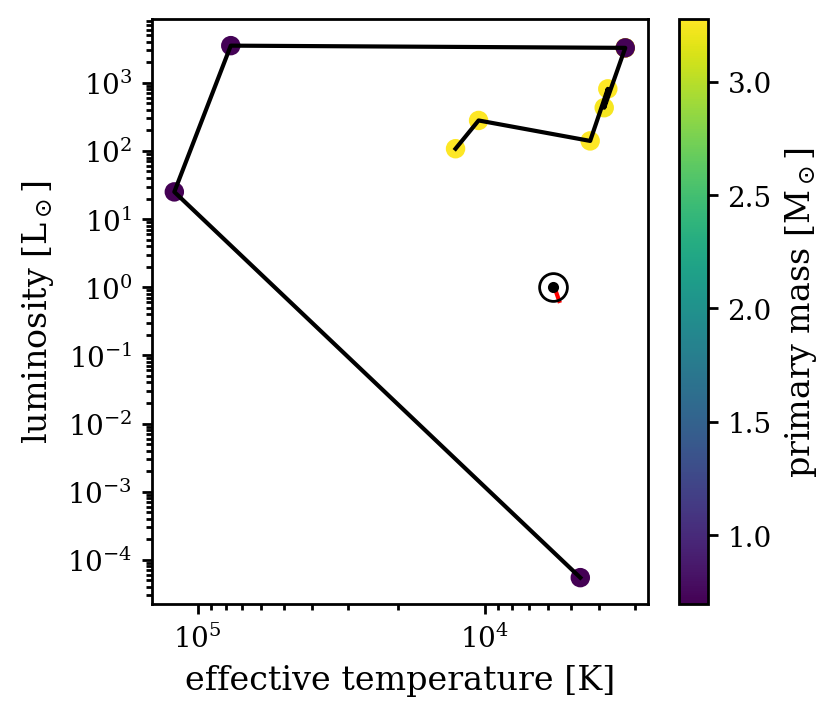

In [53]:
bn = 999978
bin1 = bpp[bpp.bin_num==bn]
plt.plot(bin1.teff_1, bin1.lum_1, 'k-')
plt.scatter(bin1.teff_1, bin1.lum_1, c=bin1.mass_1)
plt.plot(bin1.teff_2, bin1.lum_2, 'r-')

plt.colorbar(label=r'primary mass [M$_\odot$]')

plt.plot(5777, 1, 'k.')
plt.plot(5777, 1, 'ko', mfc='none', ms=10)
plt.gca().invert_xaxis()
plt.semilogx()
plt.semilogy()
plt.xlabel('effective temperature [K]')
plt.ylabel(r'luminosity [L$_\odot$]')

In [64]:
bin1

tphys    mass_1    mass_2  kstar_1  kstar_2         sep  \
9022649     0.000000  3.277102  1.000000      1.0      1.0  425.981714   
9022650   310.511737  3.277059  1.000000      2.0      1.0  425.985983   
9022651   312.202570  3.276839  1.000000      3.0      1.0  426.007920   
9022652   314.050405  3.275367  1.000010      4.0      1.0  428.153810   
9022653   383.116401  3.239009  1.000196      5.0      1.0  436.076235   
9022654   385.398367  3.223486  1.000566      5.0      1.0  379.588892   
9022655   385.398367  3.223486  1.000566      5.0      1.0  379.588892   
9022656   385.398367  0.708046  1.000566      8.0      1.0    9.660740   
9022657   385.398367  0.708046  1.000566      8.0      1.0    9.660740   
9022658   385.654436  0.694964  1.000906     11.0      1.0    9.726730   
9022659  6652.000000  0.694964  1.000906     11.0      1.0    9.672955   

               porb  ecc    RRLO_1    RRLO_2  ...  tacc_2     epoch_1  \
9022649  492.701390  0.0  0.010616  0.007345  ...     0.0    0.000000   
9022650  492.711265  0.0  0.024774  0.007386  ...     0.0   -0.000401   
9022651  492.761988  0.0  0.105115  0.007385  ...     0.0   -0.056489   
9022652  496.574776  0.0  0.334516  0.007348  ...     0.0   -0.056489   
9022653  512.594041  0.0  0.225999  0.007203  ...     0.0   -0.056489   
9022654  417.040059  0.0  1.000994  0.008267  ...     0.0   -0.056489   
9022655  417.040059  0.0  1.000994  0.008267  ...     0.0   -0.056489   
9022656    2.662355  0.0  1.000994  0.008267  ...     0.0   -0.056489   
9022657    2.662355  0.0  0.100223  0.225135  ...     0.0  329.027238   
9022658    2.699766  0.0  0.003416  0.222778  ...     0.0  385.654436   
9022659    2.677408  0.0  0.003435  0.260026  ...     0.0  385.654436   

              epoch_2  bhspin_1  bhspin_2  bin_num          dist   dist_au  \
9022649  0.000000e+00       0.0       0.0   999978  2.963555e+13  1.981014   
9022650  2.446004e-09       0.0       0.0   999978  2.963584e+13  1.981034   
9022651  2.249053e-04       0.0       0.0   999978  2.963737e+13  1.981136   
9022652  1.246520e-02       0.0       0.0   999978  2.978666e+13  1.991115   
9022653  2.582879e-01       0.0       0.0   999978  3.033782e+13  2.027958   
9022654  8.105699e-01       0.0       0.0   999978  2.640800e+13  1.765266   
9022655  8.105699e-01       0.0       0.0   999978  2.640800e+13  1.765266   
9022656  8.105699e-01       0.0       0.0   999978  6.720977e+11  0.044927   
9022657  8.105699e-01       0.0       0.0   999978  6.720977e+11  0.044927   
9022658  1.316901e+00       0.0       0.0   999978  6.766886e+11  0.045234   
9022659  1.316901e+00       0.0       0.0   999978  6.729475e+11  0.044984   

                   F2  F1  
9022649  8.556410e+05 NaN  
9022650  8.701419e+05 NaN  
9022651  8.702235e+05 NaN  
9022652  8.703549e+05 NaN  
9022653  8.744755e+05 NaN  
9022654  8.761869e+05 NaN  
9022655  8.761869e+05 NaN  
9022656  8.761869e+05 NaN  
9022657  8.761869e+05 NaN  
9022658  8.776698e+05 NaN  
9022659  1.370134e+06 NaN  

[11 rows x 48 columns]

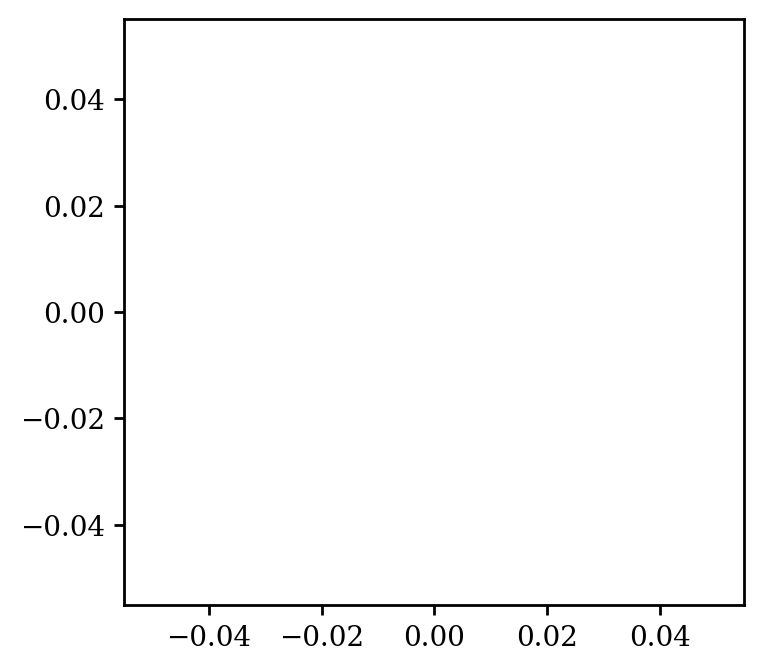

In [69]:
plt.plot(bin1.tphys, (bin1.F1+bin1.F2)/F_solar)

In [54]:
bin1.mass_2

9022649    1.000000
9022650    1.000000
9022651    1.000000
9022652    1.000010
9022653    1.000196
9022654    1.000566
9022655    1.000566
9022656    1.000566
9022657    1.000566
9022658    1.000906
9022659    1.000906
Name: mass_2, dtype: float64

[]

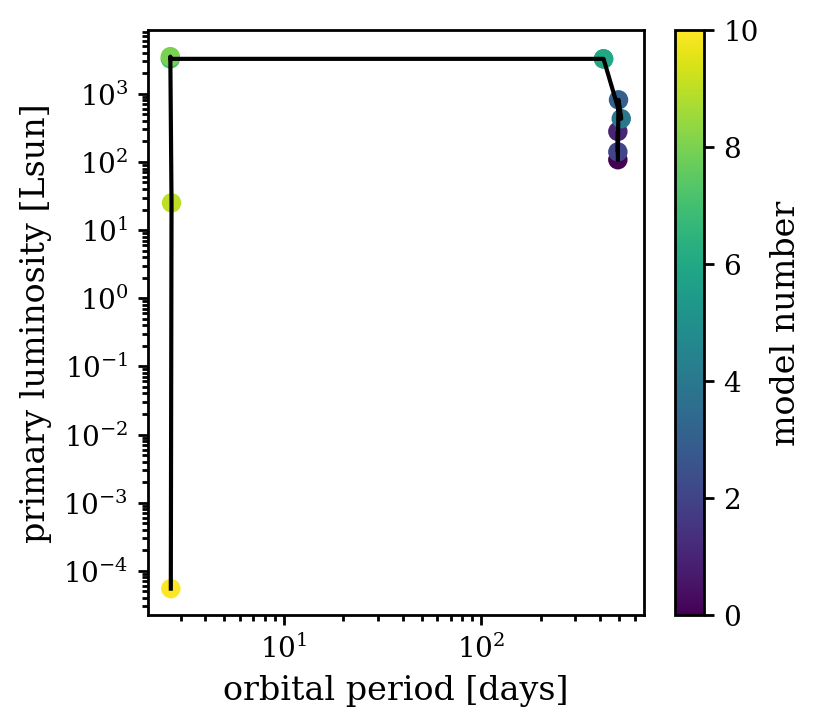

In [55]:
plt.plot(bin1.porb, bin1.lum_1, 'k-')
plt.scatter(bin1.porb, bin1.lum_1, c=range(len(bin1)))
plt.colorbar(label='model number')
plt.xlabel('orbital period [days]')
plt.ylabel('primary luminosity [Lsun]')
plt.semilogx()
plt.semilogy()

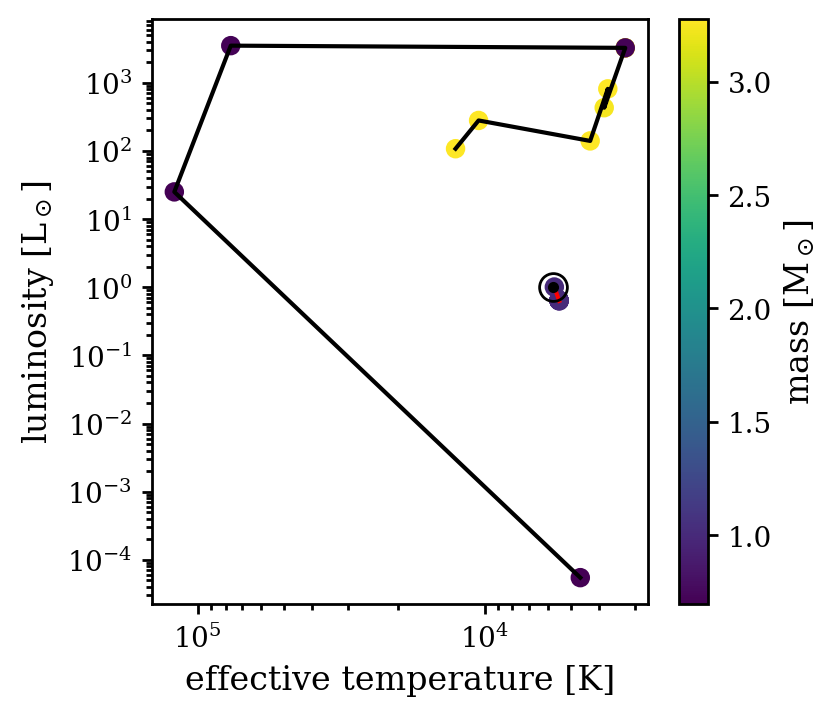

In [56]:
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=min(bin1.mass_1.min(), bin1.mass_2.min()), 
                         vmax=max(bin1.mass_1.max(), bin1.mass_2.max()))
cmap = plt.cm.viridis  

plt.plot(bin1.teff_1, bin1.lum_1, 'k-')
scatter1 = plt.scatter(bin1.teff_1, bin1.lum_1, c=bin1.mass_1, cmap=cmap, norm=norm)
plt.plot(bin1.teff_2, bin1.lum_2, 'r-')
scatter2 = plt.scatter(bin1.teff_2, bin1.lum_2, c=bin1.mass_2, cmap=cmap, norm=norm)

cb = plt.colorbar(scatter1, label=r'mass [M$_\odot$]')

plt.plot(5777, 1, 'k.')
plt.plot(5777, 1, 'ko', mfc='none', ms=10)
plt.gca().invert_xaxis()
plt.semilogx()
plt.semilogy()
plt.xlabel('effective temperature [K]')
plt.ylabel(r'luminosity [L$_\odot$]')
plt.show()
